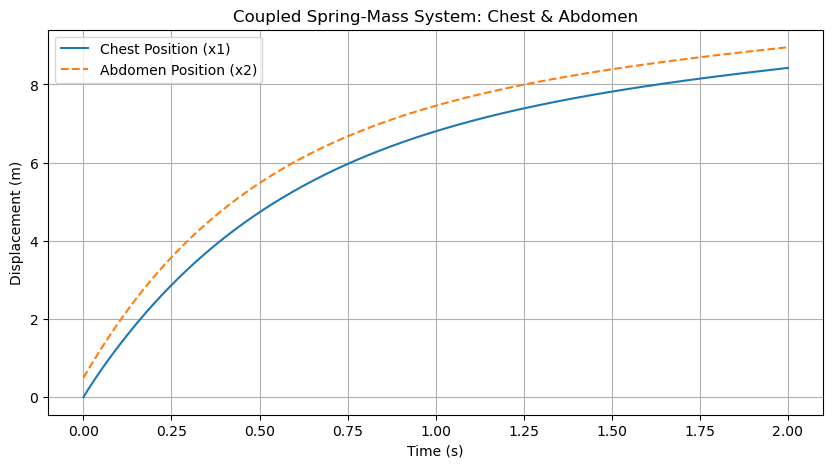

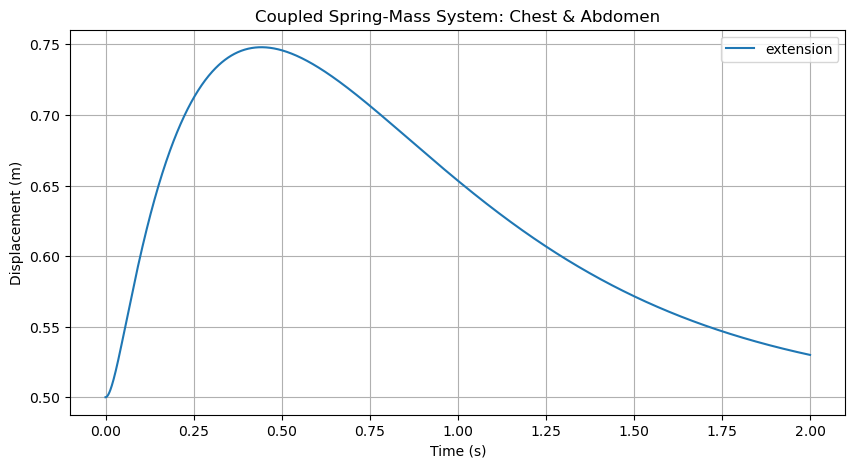

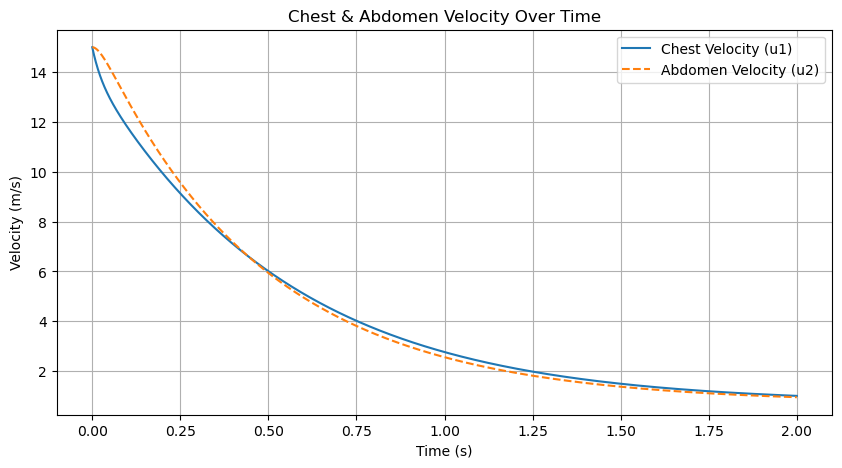

In [18]:
import numpy as np
from scipy.integrate import odeint

def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.
   
    Arguments:
    w :  vector of the state variables:
    w = [x1,y1,x2,y2]
    t :  time
    p :  vector of the parameters:
    p = [m1, m2, k, c, l, Fs]
    """

    x1, u1, x2, u2 = w
    #m1, m2, k, c, l, Fs = p 
    m1, m2, k, c, l, F0, lambda_decay = p 

    # Exponentially decaying crash force
    Fs = F0 * np.exp(-lambda_decay * t)
    
    # Equations of motion
    dx1dt = u1
    du1dt = ((k * (x2 - x1 - l) + c * (u2 - u1)) - Fs) / m1  # Force on mass m1
    dx2dt = u2
    du2dt = (-k * (x2 - x1 - l) - c * (u2 - u1)) / m2   # Force on mass m2

    return [dx1dt, du1dt, dx2dt, du2dt]

# parameter values
# masses
m1 = 30 
m2 = 40 # abdomen heavier that chest 
# spring constant 
k = 2000 # in N/m
# natrual length of spring 
l = 0.5 
# damiping coeff
c = 750 #Ns/m
# Force from crash
#Fs = 200

#p = [m1, m2, k, c, l, Fs] 

# initial force from crash
F0 = 2000
# decay rate constant for force
lambda_decay = 2  # decay rate (1/s)

# Create parameter vector
p = [m1, m2, k, c, l, F0, lambda_decay]


# Initial conditions
x1 = 0 
x2 = 0.5
u1 = 15 # m/s around 33 mph
u2 = 15 

w0 = [x1, u1, x2, u2]

t = np.linspace(0 ,2, 2000)
sol = odeint(vectorfield, w0, t, args = (p,))

# Extract solutions
x1_sol, u1_sol, x2_sol, u2_sol = sol.T


# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(t, x1_sol, label="Chest Position (x1)")
plt.plot(t, x2_sol, label="Abdomen Position (x2)", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.grid()
plt.title("Coupled Spring-Mass System: Chest & Abdomen")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, (x2_sol - x1_sol), label="extension")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.grid()
plt.title("Coupled Spring-Mass System: Chest & Abdomen")
plt.show()


# Plot velocities
plt.figure(figsize=(10, 5))
plt.plot(t, u1_sol, label="Chest Velocity (u1)")
plt.plot(t, u2_sol, label="Abdomen Velocity (u2)", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.title("Chest & Abdomen Velocity Over Time")
plt.show()



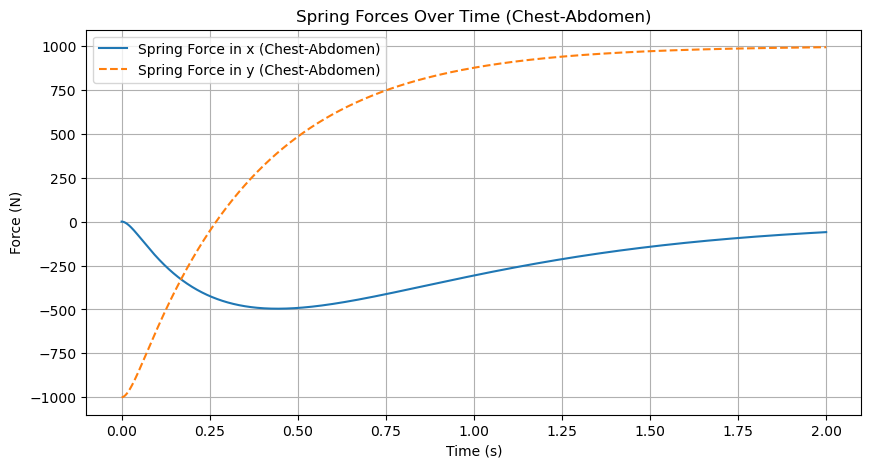

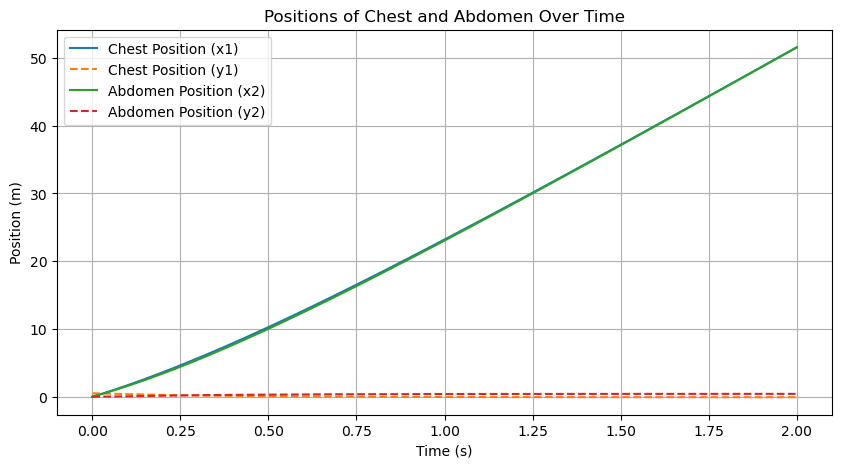

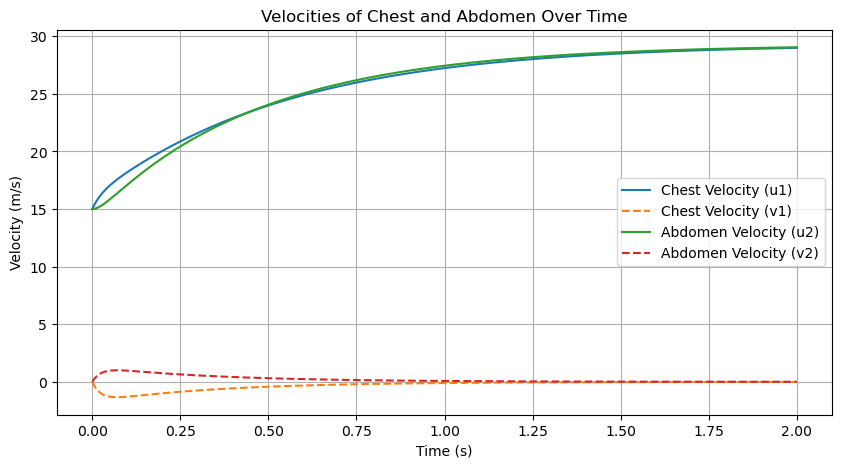

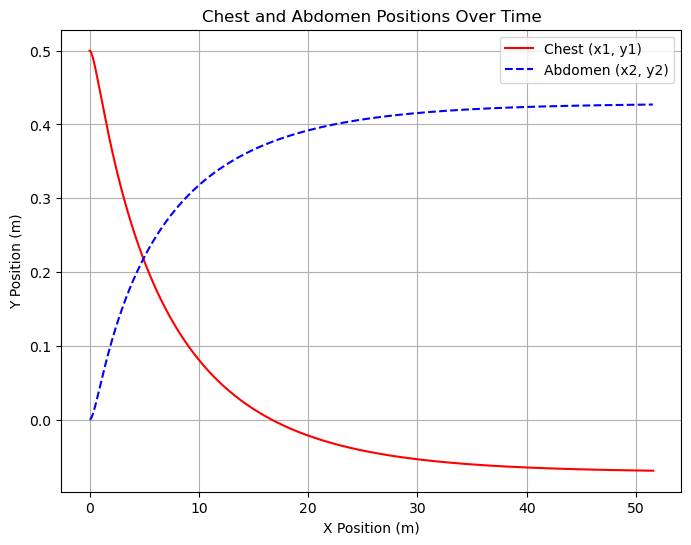

In [32]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system with exponential decay of crash force.
   
    Arguments:
    w :  vector of the state variables:
    w = [x1, y1, u1, v1, x2, y2, u2, v2]
    t :  time
    p :  vector of the parameters:
    p = [m1, m2, k, c, l, F0, lambda_decay]
    """
    x1, y1, u1, v1, x2, y2, u2, v2 = w
    m1, m2, k, c, l, F0, lambda_decay = p 

    # Exponentially decaying crash force
    Fs = F0 * np.exp(-lambda_decay * t)
    
    # Equations of motion for chest (x1, y1) and abdomen (x2, y2)
    dx1dt = u1
    dy1dt = v1
    du1dt = ((k * (x2 - x1) + c * (u2 - u1)) + Fs) / m1  # Force on chest mass
    dv1dt = ((k * (y2 - y1- l) + c * (v2 - v1))) / m1  # Force on chest mass in y direction

    dx2dt = u2
    dy2dt = v2
    du2dt = (-k * (x2 - x1) - c * (u2 - u1)) / m2  # Force on abdomen mass
    dv2dt = (-k * (y2 - y1- l) - c * (v2 - v1)) / m2  # Force on abdomen mass in y direction

    return [dx1dt, dy1dt, du1dt, dv1dt, dx2dt, dy2dt, du2dt, dv2dt]

# Parameter values
m1 = 30  # mass of chest (kg)
m2 = 40  # mass of abdomen (kg)
k = 2000  # spring constant (N/m)
l = 0.5   # natural length of the spring (m)
c = 750   # damping coefficient (Ns/m)
F0 = 2000 # initial crash force (N)
lambda_decay = 2  # decay rate constant for crash force (1/s)

# Create parameter vector
p = [m1, m2, k, c, l, F0, lambda_decay]

# Initial conditions
x1, y1 = 0, 0.5
u1, v1 = 15, 0  # initial velocities for chest
x2, y2 = 0, 0  # initial position of abdomen
u2, v2 = 15, 0  # initial velocities for abdomen
w0 = [x1, y1, u1, v1, x2, y2, u2, v2]

# Time range for simulation
t = np.linspace(0, 2, 2000)

# Solve the ODEs
sol = odeint(vectorfield, w0, t, args=(p,))

# Extract solutions
x1_sol, y1_sol, u1_sol, v1_sol, x2_sol, y2_sol, u2_sol, v2_sol = sol.T

# Calculate spring forces (only in x and y directions)
spring_force_x = k * (x2_sol - x1_sol)  # Force for chest-abdomen spring in x direction
spring_force_y = k * (y2_sol - y1_sol)  # Force for chest-abdomen spring in y direction

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(t, spring_force_x, label="Spring Force in x (Chest-Abdomen)")
plt.plot(t, spring_force_y, label="Spring Force in y (Chest-Abdomen)", linestyle='dashed')
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.legend()
plt.grid()
plt.title("Spring Forces Over Time (Chest-Abdomen)")
plt.show()

# Plot positions
plt.figure(figsize=(10, 5))
plt.plot(t, x1_sol, label="Chest Position (x1)")
plt.plot(t, y1_sol, label="Chest Position (y1)", linestyle="dashed")
plt.plot(t, x2_sol, label="Abdomen Position (x2)")
plt.plot(t, y2_sol, label="Abdomen Position (y2)", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()
plt.title("Positions of Chest and Abdomen Over Time")
plt.show()

# Plot velocities
plt.figure(figsize=(10, 5))
plt.plot(t, u1_sol, label="Chest Velocity (u1)")
plt.plot(t, v1_sol, label="Chest Velocity (v1)", linestyle="dashed")
plt.plot(t, u2_sol, label="Abdomen Velocity (u2)")
plt.plot(t, v2_sol, label="Abdomen Velocity (v2)", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.title("Velocities of Chest and Abdomen Over Time")
plt.show()

# Plot the x and y positions (x1 vs y1 for chest and x2 vs y2 for abdomen)
plt.figure(figsize=(8, 6))

# Plot the chest and abdomen positions on a 2D plane
plt.plot(x1_sol, y1_sol, label="Chest (x1, y1)", color='r')
plt.plot(x2_sol, y2_sol, label="Abdomen (x2, y2)", color='b', linestyle='dashed')

# Labels and title
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.legend()
plt.grid()
plt.title("Chest and Abdomen Positions Over Time")

# Show the plot
plt.show()


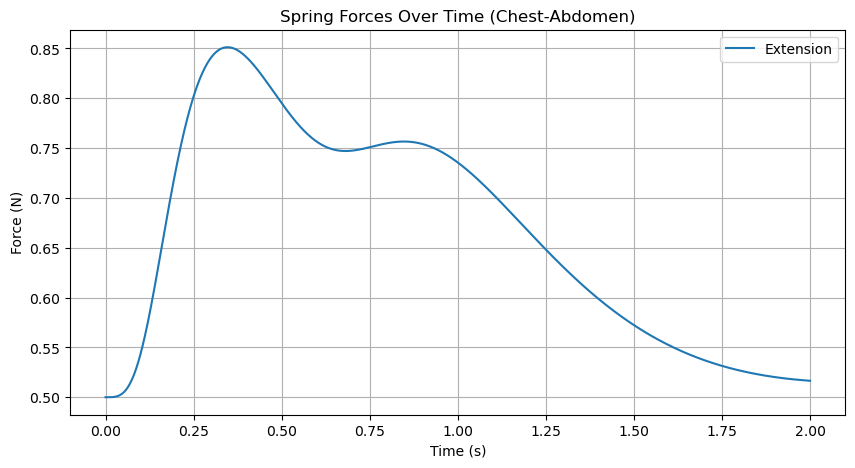

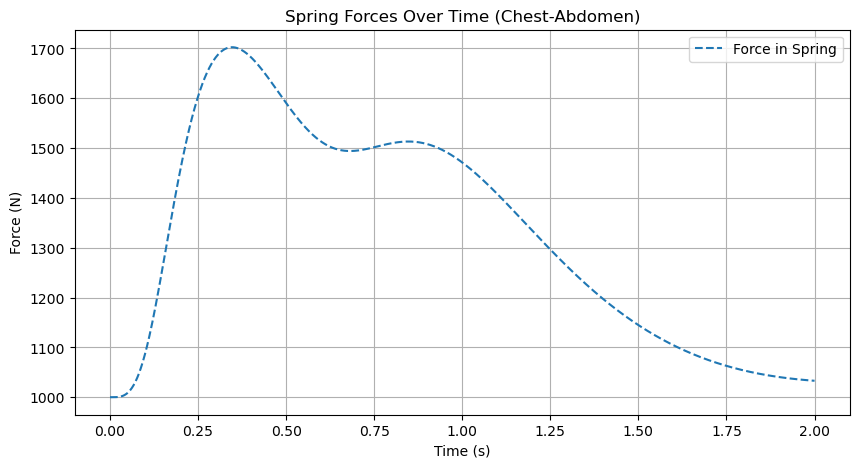

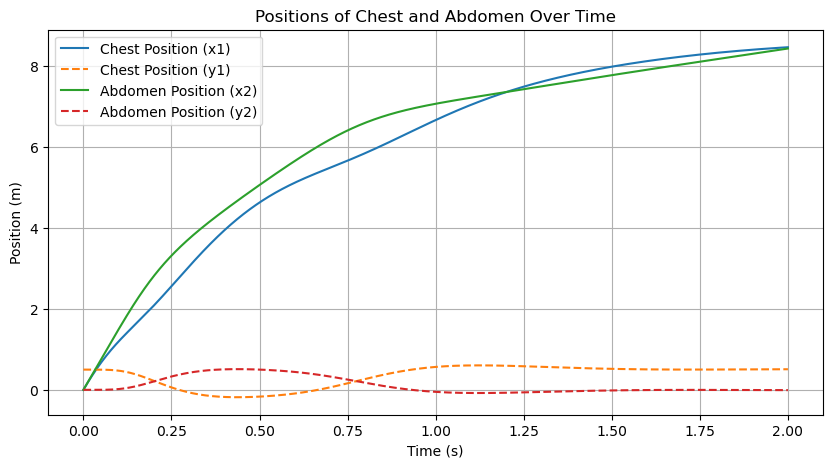

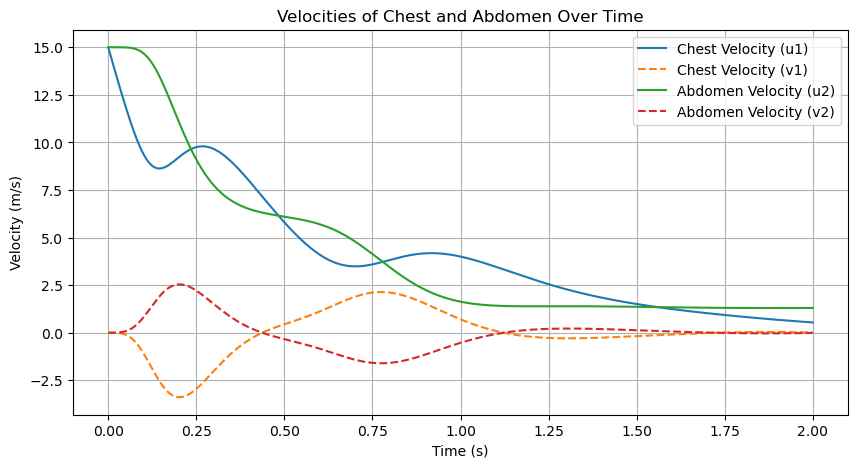

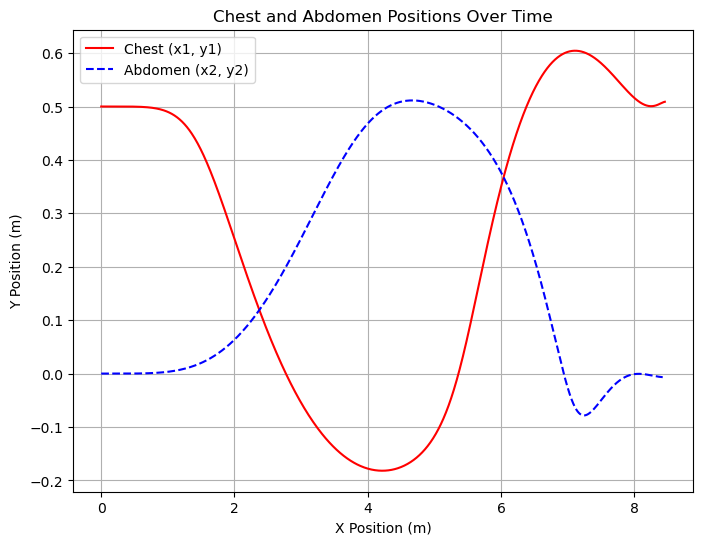

In [36]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system with exponential decay of crash force.
   
    Arguments:
    w :  vector of the state variables:
    w = [x1, y1, u1, v1, x2, y2, u2, v2]
    t :  time
    p :  vector of the parameters:
    p = [m1, m2, k, c, l, F0, lambda_decay]
    """
    x1, y1, u1, v1, x2, y2, u2, v2 = w
    m1, m2, k, c, l, F0, lambda_decay = p 

    # Exponentially decaying crash force
    Fs = F0 * np.exp(-lambda_decay * t)

    # finding the magnitude of the spring length
    spring_length= ((x2-x1)**2 + (y2- y1)**2)**0.5

    # finding the component pf velocity in spring
    velocity_projection = (u2- u1)*(x2- x1)/spring_length + (v2- v1)*(y2- y1)/spring_length

    
    # Equations of motion for chest (x1, y1) and abdomen (x2, y2)
    dx1dt = u1
    dy1dt = v1
    du1dt = (k*(spring_length- l)*(x2 - x1)/spring_length + c*velocity_projection*(x2 - x1)/spring_length - Fs) / m1  # Force on chest mass
    dv1dt = (k*(spring_length- l)*(y2 - y1)/spring_length +  c*velocity_projection*(y2 - y1)/spring_length) / m1  # Force on chest mass in y direction

    dx2dt = u2
    dy2dt = v2
    du2dt = (-k*(spring_length- l)*(x2 - x1)/spring_length - c*velocity_projection*(x2 - x1)/spring_length)/ m2  # Force on abdomen mass
    dv2dt = (-k*(spring_length- l)*(y2 - y1)/spring_length - c*velocity_projection*(y2 - y1)/spring_length) / m2  # Force on abdomen mass in y direction

    return [dx1dt, dy1dt, du1dt, dv1dt, dx2dt, dy2dt, du2dt, dv2dt]

# Parameter values
m1 = 30  # mass of chest (kg)
m2 = 40  # mass of abdomen (kg)
k = 2000  # spring constant (N/m)
l = 0.5   # natural length of the spring (m)
c = 750   # damping coefficient (Ns/m)
F0 = 2000 # initial crash force (N)
lambda_decay = 2  # decay rate constant for crash force (1/s)

# Create parameter vector
p = [m1, m2, k, c, l, F0, lambda_decay]

# Initial conditions
x1, y1 = 0, 0.5
u1, v1 = 15, 0  # initial velocities for chest
x2, y2 = 0, 0  # initial position of abdomen
u2, v2 = 15, 0  # initial velocities for abdomen
w0 = [x1, y1, u1, v1, x2, y2, u2, v2]

# Time range for simulation
t = np.linspace(0, 2, 2000)

# Solve the ODEs
sol = odeint(vectorfield, w0, t, args=(p,))

# Extract solutions
x1_sol, y1_sol, u1_sol, v1_sol, x2_sol, y2_sol, u2_sol, v2_sol = sol.T

# Calculate spring forces (only in x and y directions)
extension = ((x2_sol - x1_sol)**2 + (y2_sol - y1_sol)**2)**0.5  # Force for chest-abdomen spring in x direction
Force = k * ((x2_sol - x1_sol)**2 + (y2_sol - y1_sol)**2)**0.5 # Force for chest-abdomen spring in y direction

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(t, extension, label="Extension")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.legend()
plt.grid()
plt.title("Spring Forces Over Time (Chest-Abdomen)")
plt.show()


# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(t, Force, label="Force in Spring", linestyle='dashed')
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.legend()
plt.grid()
plt.title("Spring Forces Over Time (Chest-Abdomen)")
plt.show()

# Plot positions
plt.figure(figsize=(10, 5))
plt.plot(t, x1_sol, label="Chest Position (x1)")
plt.plot(t, y1_sol, label="Chest Position (y1)", linestyle="dashed")
plt.plot(t, x2_sol, label="Abdomen Position (x2)")
plt.plot(t, y2_sol, label="Abdomen Position (y2)", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()
plt.title("Positions of Chest and Abdomen Over Time")
plt.show()

# Plot velocities
plt.figure(figsize=(10, 5))
plt.plot(t, u1_sol, label="Chest Velocity (u1)")
plt.plot(t, v1_sol, label="Chest Velocity (v1)", linestyle="dashed")
plt.plot(t, u2_sol, label="Abdomen Velocity (u2)")
plt.plot(t, v2_sol, label="Abdomen Velocity (v2)", linestyle="dashed")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.title("Velocities of Chest and Abdomen Over Time")
plt.show()

# Plot the x and y positions (x1 vs y1 for chest and x2 vs y2 for abdomen)
plt.figure(figsize=(8, 6))

# Plot the chest and abdomen positions on a 2D plane
plt.plot(x1_sol, y1_sol, label="Chest (x1, y1)", color='r')
plt.plot(x2_sol, y2_sol, label="Abdomen (x2, y2)", color='b', linestyle='dashed')

# Labels and title
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.legend()
plt.grid()
plt.title("Chest and Abdomen Positions Over Time")

# Show the plot
plt.show()